In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import prince
import mca
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import seaborn as sns

In [2]:
Cd109=pd.read_csv("GRAPE2019_Jun_02_22_08_26_41_.dat.tdms_formatted_data_edit.csv")

In [3]:
print(Cd109)

       Plastic  LaBr  <<DATA>>
0          125   133         0
1          125   539         1
2          125   139         2
3          126   134         3
4          125   220         4
...        ...   ...       ...
15355      126   228     15355
15356      126   226     15356
15357      125   130     15357
15358      125   134     15358
15359      126   132     15359

[15360 rows x 3 columns]


In [4]:
Cd109

,Plastic,LaBr,<<DATA>>
0,125,133,0
1,125,539,1
2,125,139,2
3,126,134,3
4,125,220,4
...,...,...,...
15355,126,228,15355
15356,126,226,15356
15357,125,130,15357
15358,125,134,15358


In [5]:
Cd109.Plastic[0]+Cd109.LaBr[0]

258

In [6]:
Cd109.Plastic[1]+Cd109.LaBr[1]

664

In [7]:
cols= ['Added']
first=[]
for i in range(15360):
    added=Cd109.Plastic[i]+Cd109.LaBr[i]
    first.append([added])
    
df=pd.DataFrame(first, columns=cols)
    

In [8]:
df

,Added
0,258
1,664
2,264
3,260
4,345
...,...
15355,354
15356,352
15357,255
15358,259


In [13]:
x = (bins[:-1] + bins[1:]) / 2


In [14]:
x

array([ 50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,
        59.5,  60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,
        68.5,  69.5,  70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,
        77.5,  78.5,  79.5,  80.5,  81.5,  82.5,  83.5,  84.5,  85.5,
        86.5,  87.5,  88.5,  89.5,  90.5,  91.5,  92.5,  93.5,  94.5,
        95.5,  96.5,  97.5,  98.5,  99.5, 100.5, 101.5, 102.5, 103.5,
       104.5, 105.5, 106.5, 107.5, 108.5, 109.5, 110.5, 111.5, 112.5,
       113.5, 114.5, 115.5, 116.5, 117.5, 118.5, 119.5, 120.5, 121.5,
       122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5, 130.5,
       131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5,
       140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5,
       149.5, 150.5, 151.5, 152.5, 153.5, 154.5, 155.5, 156.5, 157.5,
       158.5, 159.5, 160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5,
       167.5, 168.5, 169.5, 170.5, 171.5, 172.5, 173.5, 174.5, 175.5,
       176.5, 177.5,

In [15]:
n

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 2.000e+00,
       1.000e+01, 2.100e+01, 3.100e+01, 3.800e+01, 4.500e+01, 4.400e+01,
       3.600e+01, 4.400e+01, 3.800e+01, 2.700e+01, 4.900e+01, 7.000e+01,
       1.220e+02, 1.540e+02, 1.880e+02, 1.550e+02, 1.220e+02, 1.220e+02,
       8.400e+01, 4.900e+01, 4.800e+01, 5.500e+01, 9.900e+01, 2.000e+02,
       3.540e+02, 5.770e+02, 8.750e+02, 1.029e+03, 

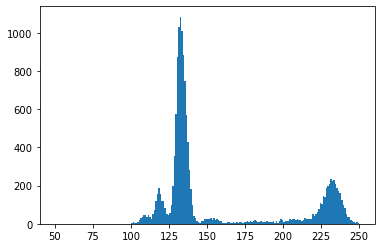

In [16]:
n, bins, patches = plt.hist(Cd109['LaBr'], bins=200, range=(50,250))

In [17]:
def fx(x, mu,sigma, A):
    return (A/(sigma*np.sqrt(2*math.pi)))*np.exp((-1/2*(x-mu)**2)/sigma**2)

In [18]:
def fline(x,m,b):
    return (m*x)+b

In [19]:
mean_cd109_22=135

In [20]:
std_cd109_22=4.25

In [21]:
Area_cd109_22=11000

In [22]:
p0_cd109_22=[mean_cd109_22,std_cd109_22,Area_cd109_22]

In [23]:
mean_cd109_88=230

In [24]:
std_cd109_88=5

In [25]:
Area_cd109_88=2625

In [26]:
p0_cd109_22=[mean_cd109_22,std_cd109_22,Area_cd109_22]

In [27]:
param1, param_cov1=curve_fit(fx,x,n,p0_cd109_22)

In [28]:
param1

array([1.32946057e+02, 3.21758479e+00, 8.59768349e+03])

In [29]:
param_cov1

array([[ 1.18740991e-02, -3.61496433e-09,  6.48472811e-08],
       [-3.61496433e-09,  1.18740994e-02,  1.58643420e+01],
       [ 6.48472811e-08,  1.58643420e+01,  6.35864683e+04]])

In [30]:
y_fit=fx(x,param1[0],param1[1],param1[2])

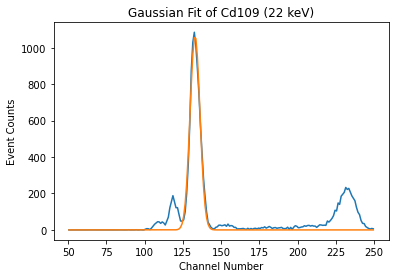

In [31]:
plt.plot(x,n, label='Data')
plt.plot(x,y_fit,label='Fit')
plt.title("Gaussian Fit of Cd109 (22 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Cd109 (22keV).jpg")

In [32]:
p0_cd109_88=[mean_cd109_88,std_cd109_88,Area_cd109_88]

In [33]:
param2, param_cov2=curve_fit(fx,x,n,p0_cd109_88)

In [34]:
param2

array([ 232.0703921 ,    6.03471809, 3342.51568595])

In [35]:
param_cov2

array([[4.73989229e+00, 3.56778209e-03, 1.09344325e+00],
       [3.56778209e-03, 4.74940510e+00, 1.31546839e+03],
       [1.09344325e+00, 1.31546839e+03, 1.09107709e+06]])

In [36]:
y_fit2=fx(x,param2[0],param2[1],param2[2])

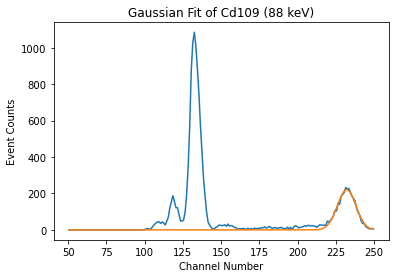

In [37]:
plt.plot(x,n, label='Data')
plt.plot(x,y_fit2,label='Fit')
plt.title("Gaussian Fit of Cd109 (88 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Cd109 (88keV).jpg")

In [38]:
Am241=pd.read_csv("GRAPE2019_Jun_02_22_08_30_54_.dat.tdms_formatted_data_edit.csv")

In [39]:
Am241

,Plastic,LaBr
0,125,166
1,125,190
2,125,181
3,125,180
4,124,159
...,...,...
26299,125,189
26300,125,171
26301,125,1162
26302,124,186


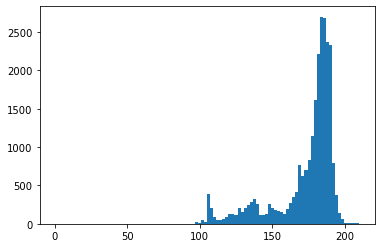

In [40]:
n2, bins2, patches2 = plt.hist(Am241['LaBr'], bins=100, range=(0,210))

In [41]:
mean_Am241=185

In [42]:
std_Am241=5

In [43]:
Area_Am241=151250

In [44]:
p0_Am241=[mean_Am241,std_Am241,Area_Am241]

In [45]:
x2 = (bins2[:-1] + bins2[1:]) / 2

In [46]:
param3, param_cov3=curve_fit(fx,x2,n2,p0_Am241)

In [47]:
param3

array([1.84601010e+02, 5.87039395e+00, 3.96095562e+04])

In [48]:
param_cov3

array([[ 5.57748744e-02, -9.68434201e-09,  1.22331463e-05],
       [-9.68434201e-09,  5.57748901e-02,  1.88167862e+02],
       [ 1.22331463e-05,  1.88167862e+02,  1.90446655e+06]])

In [49]:
y_fit3=fx(x2,param3[0],param3[1],param3[2])

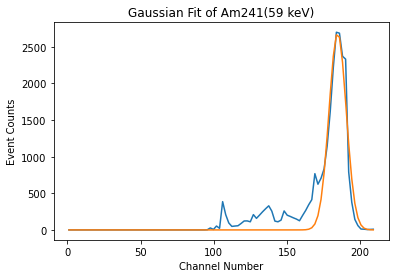

In [50]:
plt.plot(x2,n2, label='Data')
plt.plot(x2,y_fit3,label='Fit')
plt.title("Gaussian Fit of Am241(59 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Am241 (59keV).jpg")

In [51]:
Co57=pd.read_csv("GRAPE2019_Jun_02_22_08_33_13_.dat.tdms_formatted_data_edit.csv")

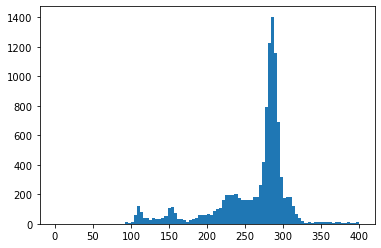

In [52]:
n3, bins3, patches3,=plt.hist(Co57['LaBr'], bins=100, range=(0,400))

In [53]:
mean_Co57=285

In [54]:
std_Co57=5

In [55]:
Area_Co57=12000

In [56]:
p0_Co57=[mean_Co57,std_Co57,Area_Co57]

In [57]:
x3 = (bins3[:-1] + bins3[1:]) / 2

In [58]:
param4, param_cov4=curve_fit(fx,x3,n3,p0_Co57)

In [59]:
param4

array([2.85454244e+02, 7.88766066e+00, 2.65323534e+04])

In [60]:
param_cov4

array([[ 1.17411584e-01, -3.20344868e-08, -9.18490939e-07],
       [-3.20344868e-08,  1.17411589e-01,  1.97470726e+02],
       [-9.18490939e-07,  1.97470726e+02,  9.96358714e+05]])

In [61]:
y_fit4=fx(x3,param4[0],param4[1],param4[2])

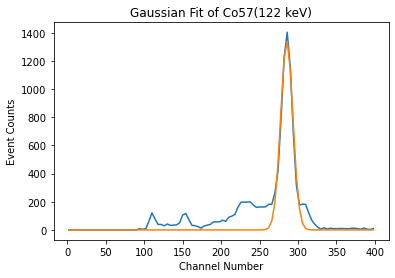

In [62]:
plt.plot(x3,n3, label='Data')
plt.plot(x3,y_fit4,label='Fit')
plt.title("Gaussian Fit of Co57(122 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Co57 (122keV).jpg")

In [63]:
Ba133=pd.read_csv("GRAPE2019_Jun_02_22_08_35_05_.dat.tdms_formatted_data_edit.csv")

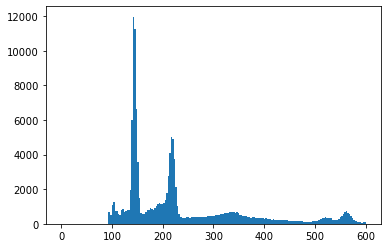

In [64]:
n4, bins4, patches4=plt.hist(Ba133['LaBr'], bins=200, range=(0,600))

In [65]:
mean_Ba133_1st=145

In [66]:
std_Ba133_1st=7.5

In [67]:
Area_Ba133_1st=135000

In [68]:
p0_Ba133_1st=[mean_Ba133_1st,std_Ba133_1st,Area_Ba133_1st]

In [69]:
x4= (bins4[:-1] + bins4[1:]) / 2

In [70]:
param5, param_cov5=curve_fit(fx,x4,n4,p0_Ba133_1st)

In [71]:
param5

array([1.44234608e+02, 4.28796663e+00, 1.29384582e+05])

In [72]:
param_cov5

array([[7.17851546e-02, 2.13744708e-09, 2.84922783e-04],
       [2.13744708e-09, 7.17853287e-02, 1.08303529e+03],
       [2.84922783e-04, 1.08303529e+03, 4.90196489e+07]])

In [73]:
y_fit5=fx(x4,param5[0],param5[1],param5[2])

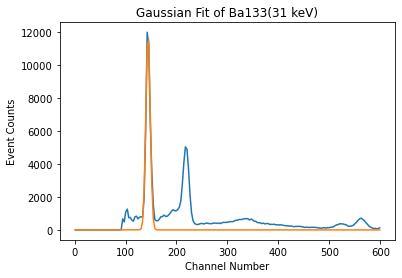

In [74]:
plt.plot(x4,n4, label='Data')
plt.plot(x4,y_fit5,label='Fit')
plt.title("Gaussian Fit of Ba133(31 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Ba133 (31keV).jpg")

In [75]:
mean_Ba133_2nd=218

In [76]:
std_Ba133_2nd=1.27

In [77]:
Area_Ba133_2nd=14750

In [78]:
p0_Ba133_2nd=[mean_Ba133_2nd,std_Ba133_2nd,Area_Ba133_2nd]

In [79]:
param6, param_cov6=curve_fit(fx,x4,n4,p0_Ba133_2nd)

In [80]:
param6

array([2.17916886e+02, 7.48681125e+00, 8.91444434e+04])

In [81]:
param_cov6

array([[ 2.32962340e+00, -5.00861693e-07,  3.82112902e-05],
       [-5.00861693e-07,  2.32962349e+00,  1.38682436e+04],
       [ 3.82112902e-05,  1.38682436e+04,  2.47672872e+08]])

In [82]:
y_fit6=fx(x4,param6[0],param6[1],param6[2])

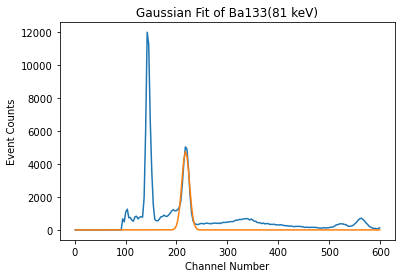

In [83]:
plt.plot(x4,n4, label='Data')
plt.plot(x4,y_fit6,label='Fit')
plt.title("Gaussian Fit of Ba133(81 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Ba133 (81keV).jpg")

In [84]:
Na22=pd.read_csv("GRAPE2019_Jun_02_22_08_41_43_.dat.tdms_formatted_data_edit.csv")

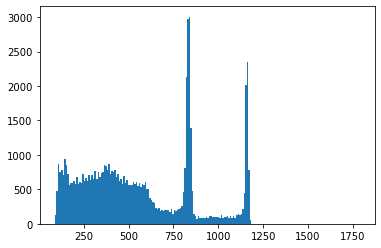

In [85]:
n5, bins5, patches5=plt.hist(Na22['LaBr'], bins=200)

In [86]:
mean_Na22=820

In [87]:
std_Na22=4.25

In [88]:
Area_Na22=67500

In [89]:
p0_Na22=[mean_Na22,std_Na22,Area_Na22]

In [90]:
x5= (bins5[:-1] + bins5[1:]) / 2

In [91]:
param7, param_cov7=curve_fit(fx,x5,n5,p0_Na22)

In [92]:
param7

array([8.33844422e+02, 1.21306802e+01, 9.60833406e+04])

In [93]:
param_cov7

array([[ 2.35600442e+00, -2.57864361e-06, -5.16189883e-03],
       [-2.57864361e-06,  2.35600581e+00,  9.33034671e+03],
       [-5.16189883e-03,  9.33034671e+03,  1.10851177e+08]])

In [94]:
y_fit7=fx(x5,param7[0],param7[1],param7[2])

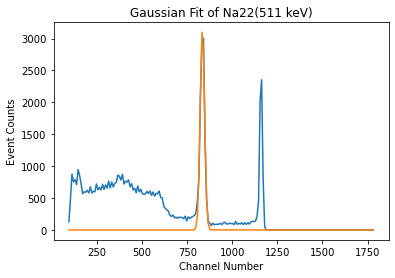

In [95]:
plt.plot(x5,n5, label='Data')
plt.plot(x5,y_fit7,label='Fit')
plt.title("Gaussian Fit of Na22(511 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Na22 (511keV).jpg")

In [96]:
Cs137=pd.read_csv("GRAPE2019_Jun_02_22_08_45_17_.dat.tdms_formatted_data_edit.csv")

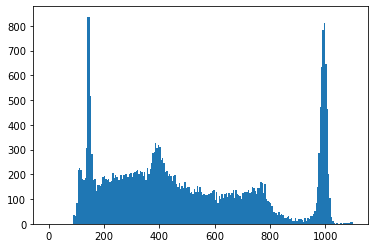

In [97]:
n6, bins6, patches6=plt.hist(Cs137['LaBr'], bins=220, range=(0,1100))

In [98]:
mean_Cs137_1st=148

In [99]:
std_Cs137_1st=3.40

In [100]:
Area_Cs137_1st=12937.5

In [101]:
p0_Cs137_1st=[mean_Cs137_1st,std_Cs137_1st,Area_Cs137_1st]

In [102]:
x6= (bins6[:-1] + bins6[1:]) / 2

In [103]:
param8, param_cov8=curve_fit(fx,x6,n6,p0_Cs137_1st)

In [104]:
param8

array([1.46215537e+02, 8.36169749e+00, 1.67222552e+04])

In [105]:
param_cov8

array([[ 2.30302220e+00, -2.99656601e-07, -1.70984894e-06],
       [-2.99656601e-07,  2.30302230e+00,  2.30311938e+03],
       [-1.70984894e-06,  2.30311938e+03,  6.90964938e+06]])

In [106]:
y_fit8=fx(x6,param8[0],param8[1],param8[2])

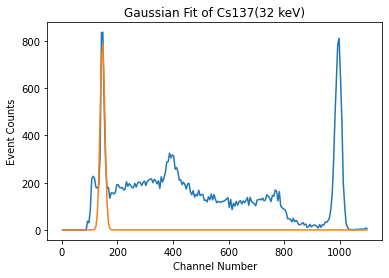

In [107]:
plt.plot(x6,n6, label='Data')
plt.plot(x6,y_fit8,label='Fit')
plt.title("Gaussian Fit of Cs137(32 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Cs137 (32keV).jpg")

In [108]:
mean_Cs137_661=990

In [109]:
std_Cs137_661=6.37

In [110]:
Area_Cs137_661=22500

In [111]:
p0_Cs137_661=[mean_Cs137_661,std_Cs137_661,Area_Cs137_661]

In [112]:
param9, param_cov9=curve_fit(fx,x6,n6,p0_Cs137_661)

In [113]:
param9

array([9.94575671e+02, 1.16398951e+01, 2.35384996e+04])

In [114]:
param_cov9

array([[ 2.76557199e+00, -1.73648506e-06,  3.05499205e-05],
       [-1.73648506e-06,  2.76557209e+00,  2.79625678e+03],
       [ 3.05499205e-05,  2.79625678e+03,  8.48184559e+06]])

In [115]:
y_fit9=fx(x6,param9[0],param9[1],param9[2])

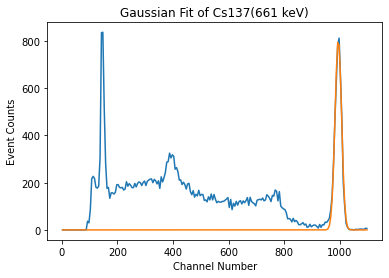

In [116]:
plt.plot(x6,n6, label='Data')
plt.plot(x6,y_fit9,label='Fit')
plt.title("Gaussian Fit of Cs137(661 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Gaussian Fit of Cs137 (661keV).jpg")

In [117]:
Energy=[22.1,30.85,32.66,59.54,80.99,88.03,122.06,511.01,661.66]

In [118]:
Energy_Low=[22.1,30.85,32.66,59.54,80.99,88.03,122.06]

In [119]:
Energy_extended=[22.1,30.85,32.66,59.54,80.99,88.03,122.06,800]

In [120]:
Channel_Num=[132.95,144.23,146.22,184.60,217.92,237.07,285.45,833.84,994.58]

In [121]:
Channel_Num_Low=[132.95,144.23,146.22,184.60,217.92,237.07,285.45]

In [122]:
Channel_Num_extended=[132.95,144.23,146.22,184.60,217.92,237.07,285.45,1336.29]

In [123]:
Error_array=[1.09,2.18,2.36,1.08,2.68,1.52,1.54,1.52,1.66]

In [124]:
Error_array_Low=[1.09,2.18,2.36,1.08,2.68,1.52,1.54]

In [125]:
param_line, param_cov_line=curve_fit(fline,Energy,Channel_Num,[0,1])

In [126]:
param_line_low, param_cov_line_low=curve_fit(fline,Energy_Low,Channel_Num_Low,[0,1])

In [127]:
param_line_extended, param_cov_line_extended=curve_fit(fline,Energy_extended,Channel_Num_extended,[0,1])

In [128]:
Energy_arr=np.array(Energy)

In [129]:
Energy_arr_low=np.array(Energy_Low)

In [130]:
Energy_arr_extended=np.array(Energy_extended)

In [131]:
param_line

array([  1.37218649, 107.68323995])

In [132]:
param_line_low

array([ 1.5459833 , 96.29081474])

In [133]:
param_cov_line

array([[ 4.37126329e-04, -7.81436171e-02],
       [-7.81436171e-02,  3.56590313e+01]])

In [134]:
param_cov_line_low

array([[ 1.37616933e-03, -8.57609069e-02],
       [-8.57609069e-02,  6.93178936e+00]])

In [135]:
param_line_extended

array([ 1.55026561, 96.03064331])

In [136]:
param_cov_line_extended

array([[ 1.91734818e-05, -2.96285419e-03],
       [-2.96285419e-03,  1.61838362e+00]])

In [137]:
y_fit_line=fline(Energy_arr,param_line[0],param_line[1])

In [138]:
y_fit_line

array([ 138.00856133,  150.0151931 ,  152.49885065,  189.38322344,
        218.81662361,  228.47681649,  275.17232267,  808.88425717,
       1015.60415159])

In [139]:
y_fit_line_low=fline(Energy_arr_low,param_line_low[0],param_line_low[1])

In [140]:
y_fit_line_low

array([130.45704577, 143.98439968, 146.78262946, 188.33866068,
       221.50000255, 232.38372501, 284.99353686])

In [141]:
y_fit_line_extended=fline(Energy_arr_extended,param_line_extended[0],param_line_extended[1])

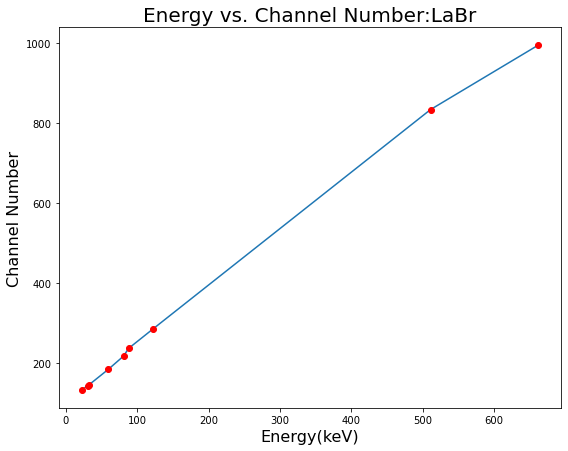

In [142]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy,Channel_Num)
plt.errorbar(Energy,Channel_Num,yerr=Error_array,fmt='o',color="red")
plt.title('Energy vs. Channel Number:LaBr',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Energy vs. Channel Number LaBr.jpg")

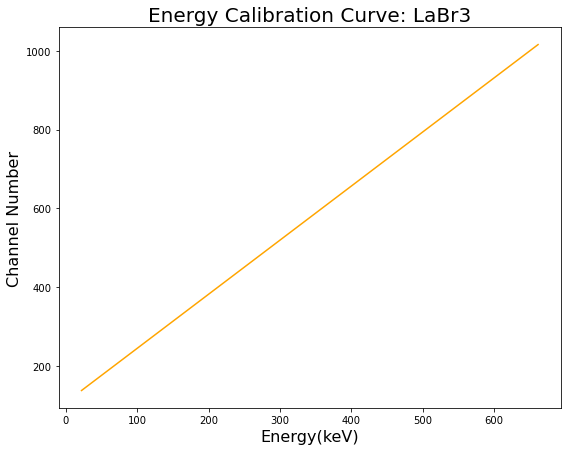

In [143]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr,y_fit_line,color="orange")
plt.title('Energy Calibration Curve: LaBr3',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Energy Calibration Curve LaBr3.jpg")

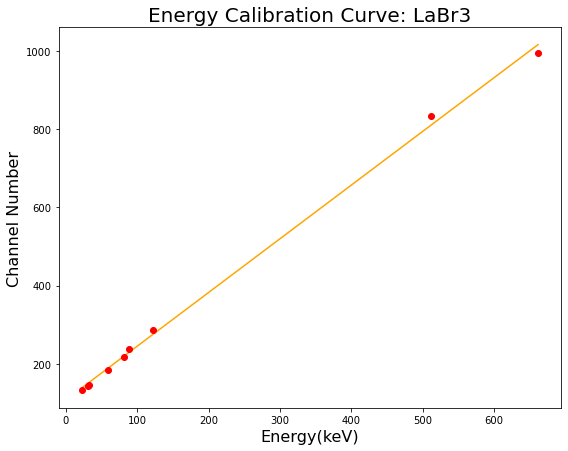

In [144]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr,y_fit_line,color="orange")
plt.errorbar(Energy,Channel_Num,yerr=Error_array,fmt='o',color="red")
plt.title('Energy Calibration Curve: LaBr3',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Energy Calibration Curve LaBr3.jpg")

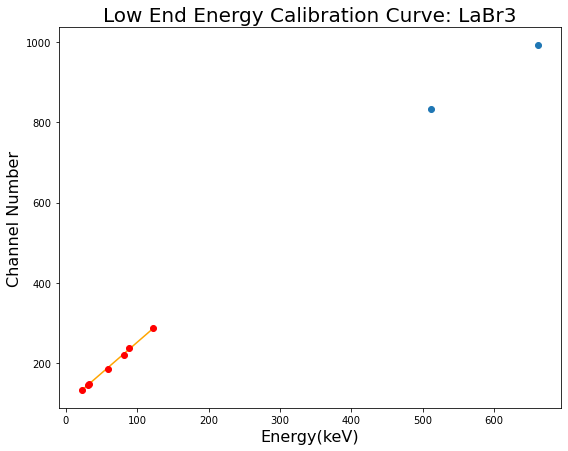

In [145]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr_low,y_fit_line_low,color="orange")
plt.errorbar(Energy_Low,Channel_Num_Low,yerr=Error_array_Low,fmt='o',color="red")
high_end_energy=[511.01,661.66]
high_end_channel=[833.84,994.58]
plt.scatter(high_end_energy,high_end_channel)
plt.title('Low End Energy Calibration Curve: LaBr3',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Low End Energy Calibration Curve LaBr3.jpg")

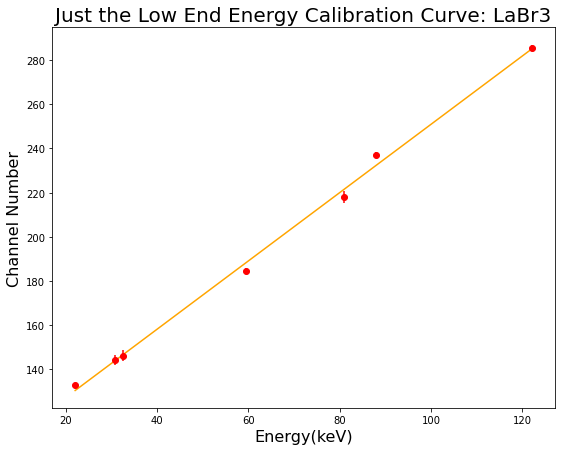

In [146]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr_low,y_fit_line_low,color="orange")
plt.errorbar(Energy_Low,Channel_Num_Low,yerr=Error_array_Low,fmt='o',color="red")
plt.title('Just the Low End Energy Calibration Curve: LaBr3',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Just the Low End Energy Calibration Curve LaBr3.jpg")

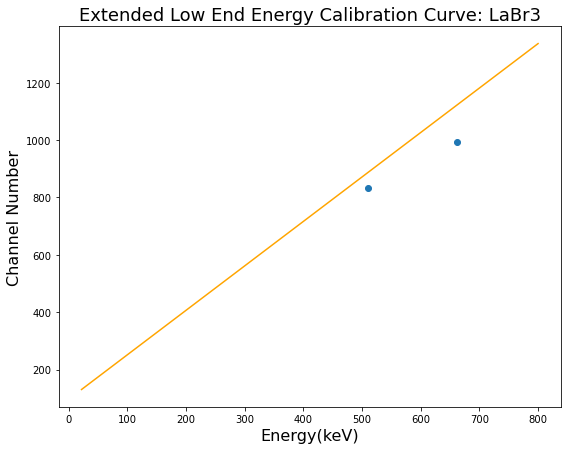

In [147]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr_extended,y_fit_line_extended,color="orange")
high_end_energy=[511.01,661.66]
high_end_channel=[833.84,994.58]
plt.scatter(high_end_energy,high_end_channel)



plt.title('Extended Low End Energy Calibration Curve: LaBr3',fontsize=18)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Extended Low End Calibration Curve LaBr3.jpg")


In [148]:
test=pd.read_csv("GRAPE2019_Jun_02_22_08_30_54_.dat.tdms_formatted_data.txt")

In [149]:
test

,125 166
0,125 190
1,125 181
2,125 180
3,124 159
4,125 138
...,...
26298,125 189
26299,125 171
26300,125 1162
26301,124 186


In [150]:
split=np.array_split(test,2)
split_items=[]
for i in split:
    split_items.append(list(i))
print(split_items)

[['125 166 '], ['125 166 ']]


In [151]:
new_test=test.shift(1)

In [152]:
new_test

,125 166
0,NaN
1,125 190
2,125 181
3,125 180
4,124 159
...,...
26298,125 185
26299,125 189
26300,125 171
26301,125 1162


In [153]:
new_test

,125 166
0,NaN
1,125 190
2,125 181
3,125 180
4,124 159
...,...
26298,125 185
26299,125 189
26300,125 171
26301,125 1162


In [154]:
index=test.index
index.name="Plastic LaBr3"

In [155]:
test

,125 166
Plastic LaBr3,
0,125 190
1,125 181
2,125 180
3,124 159
4,125 138
...,...
26298,125 189
26299,125 171
26300,125 1162


In [156]:
test.split(expand=True)

AttributeError: 'DataFrame' object has no attribute 'split'

In [157]:
type(test)

pandas.core.frame.DataFrame

In [158]:
Cd109_New=pd.read_csv("GRAPE2019_Aug_08_22_12_00_05_.dat.tdms_formatted_data_edit.csv")

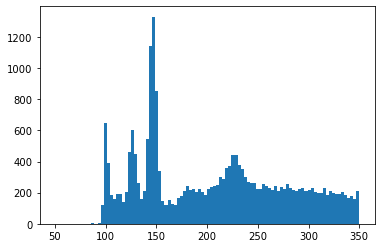

In [159]:
n10, bins10, patches10=plt.hist(Cd109_New['LaBr3'], bins=100, range=(50,350))

In [160]:
x10 = (bins10[:-1] + bins10[1:]) / 2

In [161]:
mean_cd109_new_22=125

In [162]:
std_cd109_new_22=1.49

In [163]:
Area_cd109_new_22=6500

In [164]:
p0_cd109_new_22=[mean_cd109_new_22,std_cd109_new_22,Area_cd109_new_22]

In [165]:
param10, param_cov10=curve_fit(fx,x10[23:30],n10[23:30],p0_cd109_new_22)

In [166]:
param10

array([1.26995329e+02, 5.36999918e+00, 7.29734834e+03])

In [167]:
param_cov10

array([[ 6.54459092e-01, -1.46763454e-01, -1.33608501e+02],
       [-1.46763454e-01,  8.27158355e-01,  6.19353119e+02],
       [-1.33608501e+02,  6.19353119e+02,  9.90489144e+05]])

In [168]:
y_fit10=fx(x10,param10[0],param10[1],param10[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

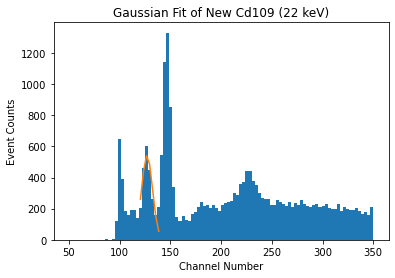

In [169]:
n10, bins10, patches10=plt.hist(Cd109_New['LaBr3'], bins=100, range=(50,350))
plt.plot(x10[23:30],y_fit10[23:30],label='Fit')
plt.title("Gaussian Fit of New Cd109 (22 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [170]:
mean_cd109_new_88=225

In [171]:
std_cd109_new_88=3.19

In [172]:
Area_cd109_new_88=6000

In [173]:
p0_cd109_new_88=[mean_cd109_new_88,std_cd109_new_88,Area_cd109_new_88]

In [174]:
param11, param_cov11=curve_fit(fx,x10[55:65],n10[55:65],p0_cd109_new_88)

In [175]:
param11

array([2.27665963e+02, 1.42925306e+01, 1.48642167e+04])

In [176]:
param_cov11

array([[ 5.90986111e-01, -3.89304656e-01, -3.40227987e+02],
       [-3.89304656e-01,  1.69438639e+00,  1.31046195e+03],
       [-3.40227987e+02,  1.31046195e+03,  1.16193376e+06]])

In [177]:
y_fit11=fx(x10,param11[0],param11[1],param11[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

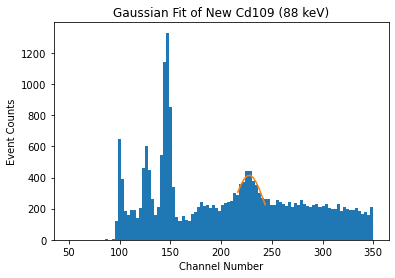

In [178]:
n10, bins10, patches10=plt.hist(Cd109_New['LaBr3'], bins=100, range=(50,350))
plt.plot(x10[55:65],y_fit11[55:65],label='Fit')
plt.title("Gaussian Fit of New Cd109 (88 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [179]:
Co57_New=pd.read_csv("GRAPE2019_Aug_08_22_12_26_08_.dat.tdms_formatted_data_edit.csv")

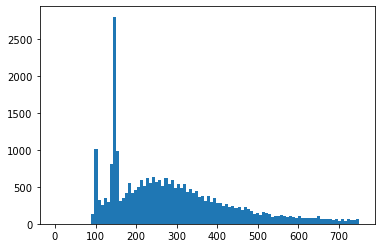

In [180]:
n11, bins11, patches11=plt.hist(Co57_New['LaBr3'], bins=100, range=(0,750))

In [181]:
x11 = (bins11[:-1] + bins11[1:]) / 2

In [182]:
mean_Co57_new=250

In [183]:
std_Co57_new=9.56

In [184]:
Area_Co57_new=61250

In [185]:
p0_Co57_new=[mean_Co57_new,std_Co57_new,Area_Co57_new]

In [186]:
param12, param_cov12=curve_fit(fx,x11[22:82],n11[22:82],p0_Co57_new)

In [187]:
param12

array([2.48829454e+02, 1.52731639e+02, 2.06951823e+05])

In [188]:
param_cov12

array([[ 6.54203834e+01, -4.70930597e+01, -6.50404534e+04],
       [-4.70930597e+01,  5.33578329e+01,  6.39447198e+04],
       [-6.50404534e+04,  6.39447198e+04,  9.19832500e+07]])

In [189]:
y_fit12=fx(x11,param12[0],param12[1],param12[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

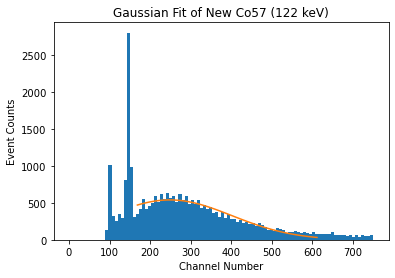

In [190]:
n11, bins11, patches11=plt.hist(Co57_New['LaBr3'], bins=100, range=(0,750))
plt.plot(x11[22:82],y_fit12[22:82],label='Fit')
plt.title("Gaussian Fit of New Co57 (122 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [191]:
Am241_New=pd.read_csv("GRAPE2019_Aug_08_22_13_14_08_.dat.tdms_formatted_data_edit.csv")

<function matplotlib.pyplot.legend(*args, **kwargs)>

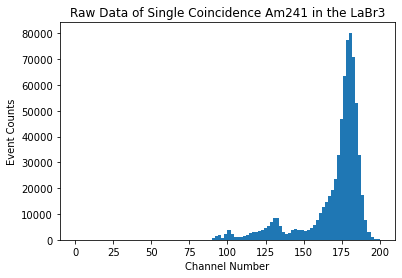

In [192]:
n12, bins12, patches12=plt.hist(Am241_New['LaBr3'], bins=100, range=(0,200))
plt.title("Raw Data of Single Coincidence Am241 in the LaBr3")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [193]:
x12 = (bins12[:-1] + bins12[1:]) / 2

In [194]:
mean_Am241_new=180

In [195]:
std_Am241_new=1.06

In [196]:
Area_Am241_new=1000000

In [197]:
p0_Am241_new=[mean_Am241_new,std_Am241_new,Area_Am241_new]

In [198]:
param13, param_cov13=curve_fit(fx,x12[87:99],n12[87:99],p0_Am241_new)

In [199]:
param13

array([1.80345976e+02, 4.98274529e+00, 1.01203145e+06])

In [200]:
param_cov13

array([[ 1.39364911e-03, -5.27187834e-04, -7.71893033e+01],
       [-5.27187834e-04,  1.75899973e-03,  2.10748227e+02],
       [-7.71893033e+01,  2.10748227e+02,  4.70085002e+07]])

In [201]:
y_fit13=fx(x12,param13[0],param13[1],param13[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

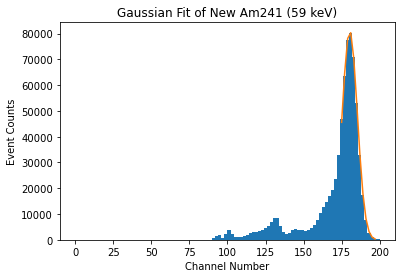

In [202]:
n12, bins12, patches12=plt.hist(Am241_New['LaBr3'], bins=100, range=(0,200))
plt.plot(x12[87:99],y_fit13[87:99],label='Fit')
plt.title("Gaussian Fit of New Am241 (59 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [203]:
Na22_New=pd.read_csv("GRAPE2019_Aug_08_22_13_51_00_.dat.tdms_formatted_data_edit.csv")

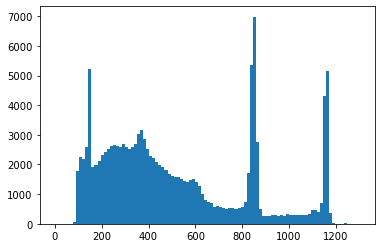

In [204]:
n13, bins13, patches13=plt.hist(Na22_New['LaBr3'], bins=100, range=(0,1300))

In [205]:
x13 = (bins13[:-1] + bins13[1:]) / 2

In [206]:
mean_Na22_new=820

In [207]:
std_Na22_new=2.12

In [208]:
Area_Na22_new=70000

In [209]:
p0_Na22_new=[mean_Na22_new,std_Na22_new,Area_Na22_new]

In [210]:
param14, param_cov14=curve_fit(fx,x13[63:70],n13[63:70],p0_Na22_new)

In [211]:
param14

array([8.47588687e+02, 1.25865890e+01, 2.26302363e+05])

In [212]:
param_cov14

array([[ 2.12175468e-01, -1.86031377e-04, -6.40644442e+00],
       [-1.86031377e-04,  2.19087206e-01,  1.97441213e+03],
       [-6.40644442e+00,  1.97441213e+03,  5.20035081e+07]])

In [213]:
y_fit14=fx(x13,param14[0],param14[1],param14[2])

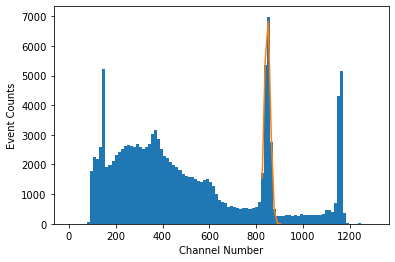

In [214]:
n13, bins13, patches13=plt.hist(Na22_New['LaBr3'], bins=100, range=(0,1300))
plt.plot(x13[63:70],y_fit14[63:70],label='Fit')
#plt.title("Gaussian Fit of New Na22 (511 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend
plt.savefig("Sample LaBr3 Data.jpg")

In [215]:
Cs137_New=pd.read_csv("GRAPE2019_Aug_08_22_14_51_29_.dat.tdms_formatted_data_edit.csv")

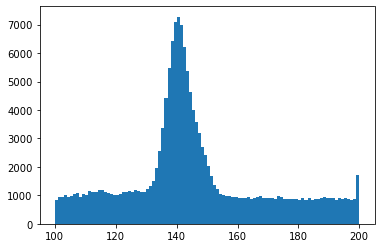

In [216]:
n14, bins14, patches14=plt.hist(Cs137_New['LaBr3'], bins=100, range=(100,200))

In [217]:
x14 = (bins14[:-1] + bins14[1:]) / 2

In [218]:
mean_Cs137_32_new=145

In [219]:
std_Cs137_32_new=2.12

In [220]:
Area_Cs137_32_new=375000

In [221]:
p0_Cs137_32_new=[mean_Cs137_32_new,std_Cs137_32_new,Area_Cs137_32_new]

In [222]:
param15, param_cov15=curve_fit(fx,x14[34:55],n14[34:55],p0_Cs137_32_new)

In [223]:
param15

array([1.41027378e+02, 5.53336684e+00, 9.10358434e+04])

In [224]:
param_cov15

array([[ 7.14817231e-02, -2.70358714e-02, -3.23477787e+02],
       [-2.70358714e-02,  9.16421341e-02,  8.92878918e+02],
       [-3.23477787e+02,  8.92878918e+02,  1.60005352e+07]])

In [225]:
y_fit15=fx(x14,param15[0],param15[1],param15[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

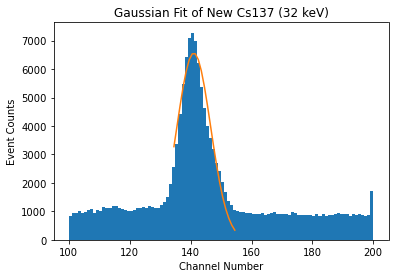

In [226]:
n14, bins14, patches14=plt.hist(Cs137_New['LaBr3'], bins=100, range=(100,200))
plt.plot(x14[34:55],y_fit15[34:55],label='Fit')
plt.title("Gaussian Fit of New Cs137 (32 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

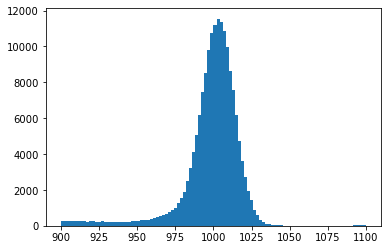

In [227]:
n14_2, bins14_2, patches14_2=plt.hist(Cs137_New['LaBr3'], bins=100, range=(900,1100))

In [228]:
x14_2 = (bins14_2[:-1] + bins14_2[1:]) / 2

In [229]:
mean_Cs137_661_new=1100

In [230]:
std_Cs137_661_new=26.55

In [231]:
Area_Cs137_661_new=30000

In [232]:
p0_Cs137_661_new=[mean_Cs137_661_new,std_Cs137_661_new,Area_Cs137_661_new]

In [233]:
param16, param_cov16=curve_fit(fx,x14_2[43:68],n14_2[43:68],p0_Cs137_661_new)

In [234]:
param16

array([1.00295414e+03, 1.07302121e+01, 3.09721470e+05])

In [235]:
param_cov16

array([[ 2.86005153e-03, -5.25125337e-04, -1.00583309e+01],
       [-5.25125337e-04,  3.42223430e-03,  5.34002261e+01],
       [-1.00583309e+01,  5.34002261e+01,  1.90537387e+06]])

In [236]:
y_fit16=fx(x14_2,param16[0],param16[1],param16[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

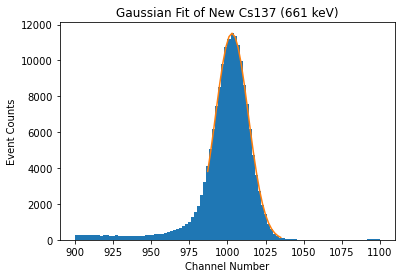

In [237]:
n14_2, bins14_2, patches14_2=plt.hist(Cs137_New['LaBr3'], bins=100, range=(900,1100))
plt.plot(x14_2[43:68],y_fit16[43:68],label='Fit')
plt.title("Gaussian Fit of New Cs137 (661 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [238]:
Ba133_New=pd.read_csv("GRAPE2019_Aug_08_22_16_14_08_.dat.tdms_formatted_data_edit.csv")

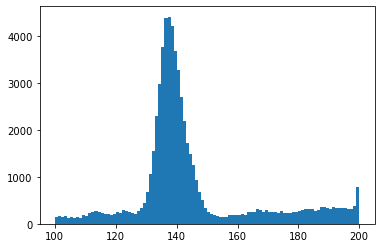

In [239]:
n15, bins15, patches15=plt.hist(Ba133_New['LaBr3'], bins=100, range=(100,200))

In [240]:
x15 = (bins15[:-1] + bins15[1:]) / 2

In [241]:
mean_Ba133_31_new=145

In [242]:
std_Ba133_31_new=2.12

In [243]:
Area_Ba133_31_new=40000

In [244]:
p0_Ba133_31_new=[mean_Ba133_31_new,std_Ba133_31_new,Area_Ba133_31_new]

In [245]:
param17, param_cov17=curve_fit(fx,x15[33:55],n15[33:55],p0_Ba133_31_new)

In [246]:
param17

array([1.37773143e+02, 4.56963607e+00, 4.74100541e+04])

In [247]:
param_cov17

array([[ 3.26918326e-02, -1.78002421e-02, -1.46387704e+02],
       [-1.78002421e-02,  3.93419015e-02,  2.66321461e+02],
       [-1.46387704e+02,  2.66321461e+02,  2.84602705e+06]])

In [248]:
y_fit17=fx(x15,param17[0],param17[1],param17[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

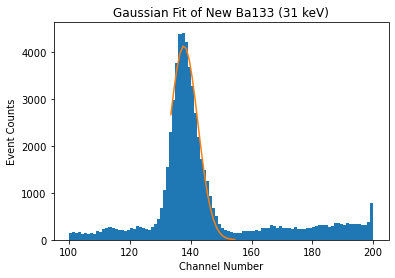

In [249]:
n15, bins15, patches15=plt.hist(Ba133_New['LaBr3'], bins=100, range=(100,200))
plt.plot(x15[33:55],y_fit17[33:55],label='Fit')
plt.title("Gaussian Fit of New Ba133 (31 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

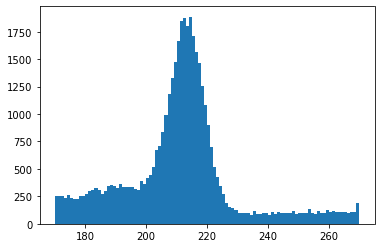

In [250]:
n15_2, bins15_2, patches15_2=plt.hist(Ba133_New['LaBr3'], bins=100, range=(170,270))

In [251]:
x15_2 = (bins15_2[:-1] + bins15_2[1:]) / 2

In [252]:
mean_Ba133_81_new=215

In [253]:
std_Ba133_81_new=2.12

In [254]:
Area_Ba133_81_new=75000

In [255]:
p0_Ba133_81_new=[mean_Ba133_81_new,std_Ba133_81_new,Area_Ba133_81_new]

In [256]:
param18, param_cov18=curve_fit(fx,x15_2[36:60],n15_2[36:60],p0_Ba133_81_new)

In [257]:
param18

array([2.13251739e+02, 6.01586335e+00, 2.79966943e+04])

In [258]:
param_cov18

array([[ 5.43854762e-03, -2.32085918e-03, -8.03779235e+00],
       [-2.32085918e-03,  6.84500552e-03,  1.93288192e+01],
       [-8.03779235e+00,  1.93288192e+01,  9.65389278e+04]])

In [259]:
y_fit18=fx(x15_2,param18[0],param18[1],param18[2])

<function matplotlib.pyplot.legend(*args, **kwargs)>

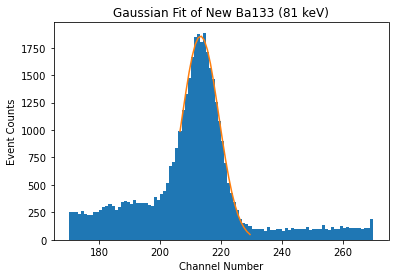

In [260]:
n15_2, bins15_2, patches15_2=plt.hist(Ba133_New['LaBr3'], bins=100, range=(170,270))
plt.plot(x15_2[36:60],y_fit18[36:60],label='Fit')
plt.title("Gaussian Fit of New Ba133 (81 keV)")
plt.xlabel("Channel Number")
plt.ylabel("Event Counts")
plt.legend

In [261]:
Channel_Array_New=[127,138,141.11,180.35,212.89,227.67,248.83,847.59,1002.79]

In [262]:
Channel_Array_Low_New=[127,138,141.11,180.35,212.89,227.67,248.83]

In [263]:
Channel_Array_Extended_New=[127,138,141.11,180.35,212.89,227.67,248.83,1224.03]

In [264]:
Error_Array_New=[.81,.14,.36,.04,.26,.77,8.09,.46,.1]

In [265]:
Error_Array_New_Low=[.81,.14,.36,.04,.26,.77,8.09]

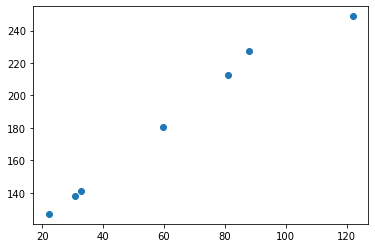

In [266]:
plt.scatter(Energy_Low, Channel_Array_Low_New)

In [267]:
param_line_low_new, param_cov_line_low_new=curve_fit(fline,Energy_Low,Channel_Array_Low_New,[0,1])

In [268]:
param_line_low_new

array([  1.30760737, 100.77606209])

In [269]:
param_cov_line_low_new

array([[ 8.33234974e-03, -5.19260136e-01],
       [-5.19260136e-01,  4.19701944e+01]])

In [270]:
param_line_new, param_cov_line_new=curve_fit(fline,Energy,Channel_Array_New,[0,1])

In [271]:
param_line_new

array([ 1.40591325, 96.02846402])

In [272]:
param_cov_line_new

array([[ 6.64146698e-04, -1.18727290e-01],
       [-1.18727290e-01,  5.41784534e+01]])

In [273]:
param_line_extended_new, param_cov_line_extended_new=curve_fit(fline,Energy_extended,Channel_Array_Extended_New,[0,1])

In [274]:
param_line_extended_new

array([ 1.41047204, 94.52651854])

In [275]:
param_cov_line_extended_new

array([[ 1.45679949e-04, -2.25117402e-02],
       [-2.25117402e-02,  1.22964640e+01]])

In [276]:
y_fit_line_new=fline(Energy_arr,param_line_new[0],param_line_new[1])

In [277]:
y_fit_line_low_new=fline(Energy_arr_low,param_line_low_new[0],param_line_low_new[1])

In [278]:
y_fit_line_extended_new=fline(Energy_arr_extended,param_line_extended_new[0],param_line_extended_new[1])

Text(0, 0.5, 'Channel Number')

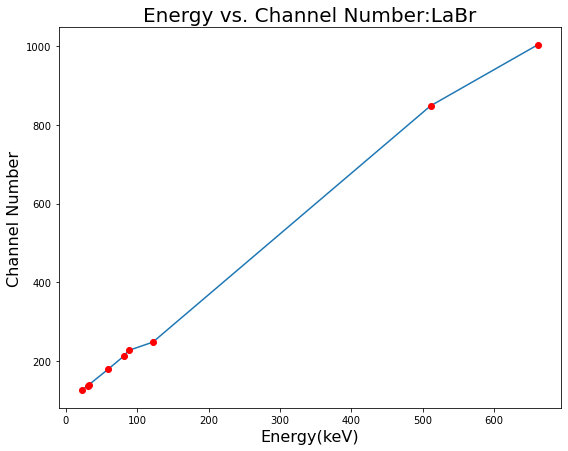

In [279]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy,Channel_Array_New)
plt.errorbar(Energy,Channel_Array_New,yerr=Error_Array_New,fmt='o',color="red")
plt.title('Energy vs. Channel Number:LaBr',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)

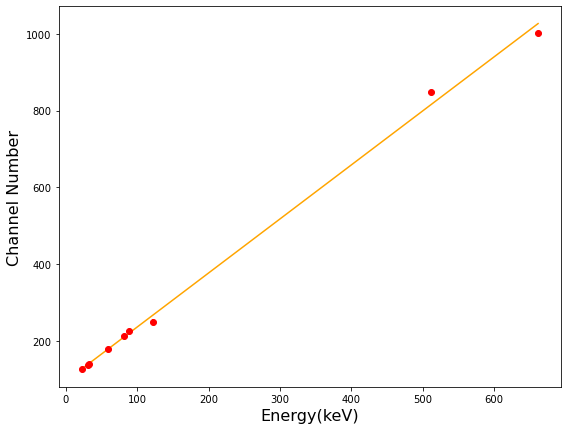

In [280]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy,y_fit_line_new,color="orange")
plt.errorbar(Energy,Channel_Array_New,yerr=Error_Array_New,fmt='o',color="red")
#plt.title('Energy Calibration Curve: $LaBr_3$',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)
plt.savefig("Energy Calibration Curve LaBr3.pdf")

Text(0, 0.5, 'Channel Number')

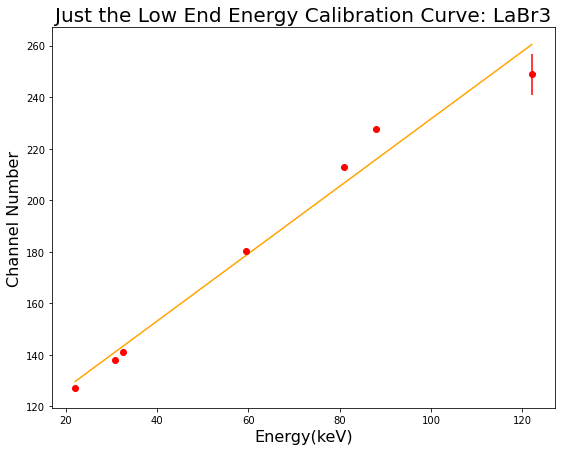

In [281]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr_low,y_fit_line_low_new,color="orange")
plt.errorbar(Energy_Low,Channel_Array_Low_New,yerr=Error_Array_New_Low,fmt='o',color="red")
plt.title('Just the Low End Energy Calibration Curve: LaBr3',fontsize=20)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)

Text(0, 0.5, 'Channel Number')

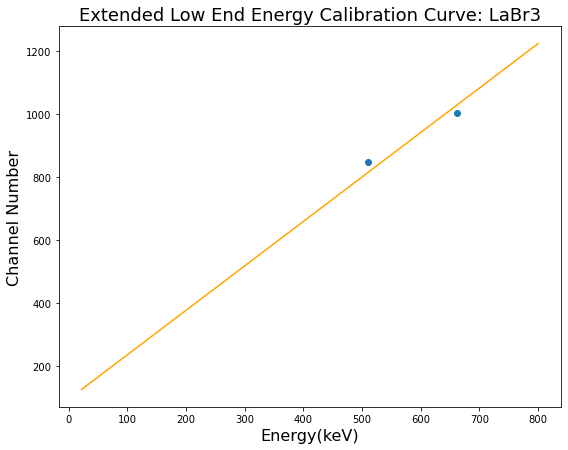

In [282]:
fig=plt.figure(figsize=(9,7))
plt.plot(Energy_arr_extended,y_fit_line_extended_new,color="orange")
high_end_energy_new=[511.01,661.66]
high_end_channel_new=[847.59,1002.79]
plt.scatter(high_end_energy_new,high_end_channel_new)



plt.title('Extended Low End Energy Calibration Curve: LaBr3',fontsize=18)
plt.xlabel('Energy(keV)',fontsize=16)
plt.ylabel('Channel Number',fontsize=16)